In [1]:
#Revisión inicial de los datos
import pandas as pd

df = pd.read_csv('cars.csv')

# Vista general
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Datos faltantes

  manufacturer_name model_name transmission   color  odometer_value  \
0            Subaru    Outback    automatic  silver          190000   
1            Subaru    Outback    automatic    blue          290000   
2            Subaru   Forester    automatic     red          402000   
3            Subaru    Impreza   mechanical    blue           10000   
4            Subaru     Legacy    automatic   black          280000   

   year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  \
0           2010    gasoline           False    gasoline              2.5   
1           2002    gasoline           False    gasoline              3.0   
2           2001    gasoline           False    gasoline              2.5   
3           1999    gasoline           False    gasoline              3.0   
4           2001    gasoline           False    gasoline              2.5   

   ... feature_1  feature_2 feature_3 feature_4  feature_5  feature_6  \
0  ...      True       True      True

In [2]:
#¿Cuántos autos hay y qué columnas tiene la base?
print(f"Total de autos: {df.shape[0]}")
print("Columnas:", df.columns.tolist())

Total de autos: 38531
Columnas: ['manufacturer_name', 'model_name', 'transmission', 'color', 'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas', 'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state', 'drivetrain', 'price_usd', 'is_exchangeable', 'location_region', 'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'duration_listed']


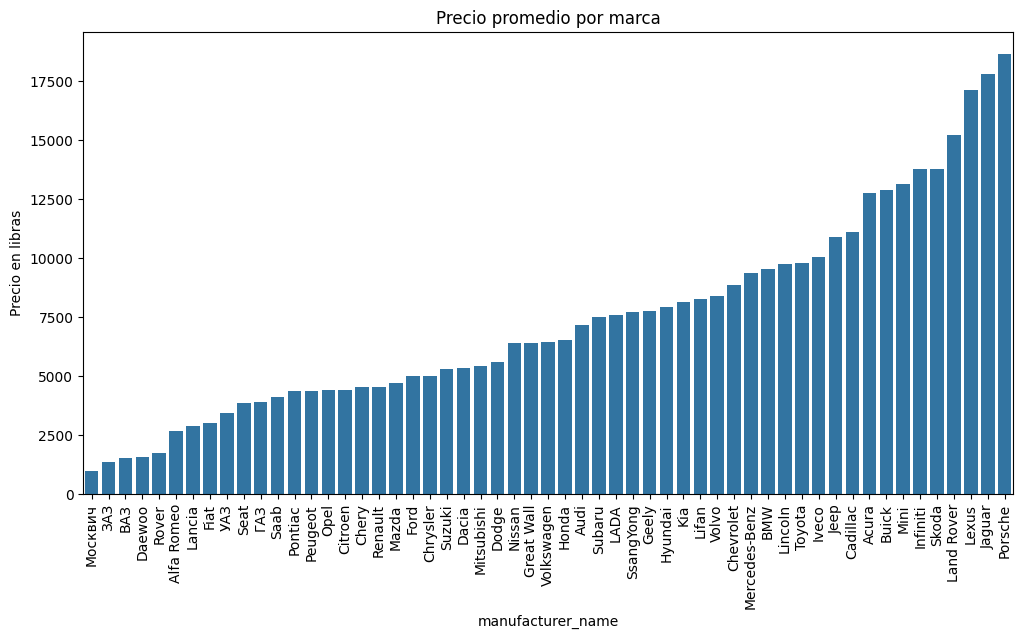

In [7]:
#Precios promedio por marca
import seaborn as sns
import matplotlib.pyplot as plt

avg_price_brand = df.groupby('manufacturer_name')['price_usd'].mean().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_brand.index, y=avg_price_brand.values)
plt.xticks(rotation=90)
plt.title('Precio promedio por marca')
plt.ylabel('Precio en libras')
plt.show()

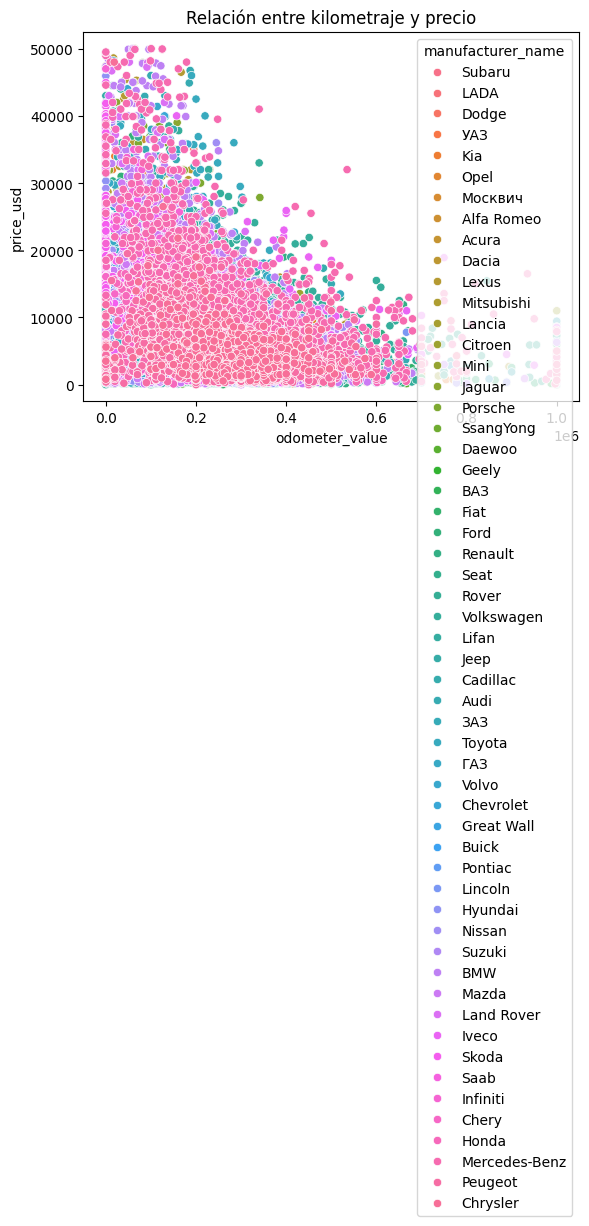

In [9]:
#Relación entre kilometraje y promedio
sns.scatterplot(data=df, x='odometer_value', y='price_usd', hue='manufacturer_name')
plt.title('Relación entre kilometraje y precio')
plt.show()

transmission
mechanical    25633
automatic     12898
Name: count, dtype: int64


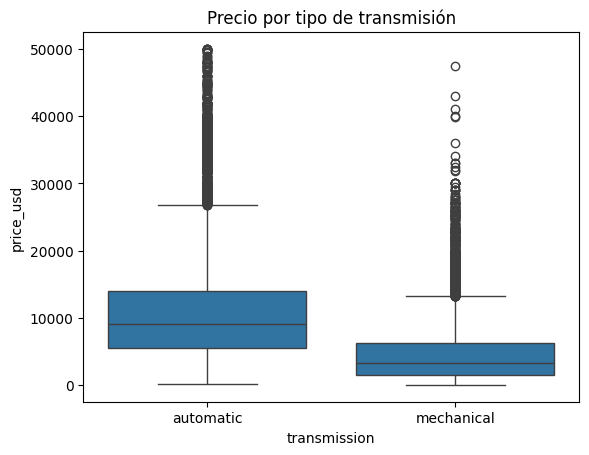

In [10]:
#Transmisión más común y costosa
# Tipo más común
print(df['transmission'].value_counts())

# Precio promedio por tipo de transmisión
sns.boxplot(x='transmission', y='price_usd', data=df)
plt.title('Precio por tipo de transmisión')
plt.show()

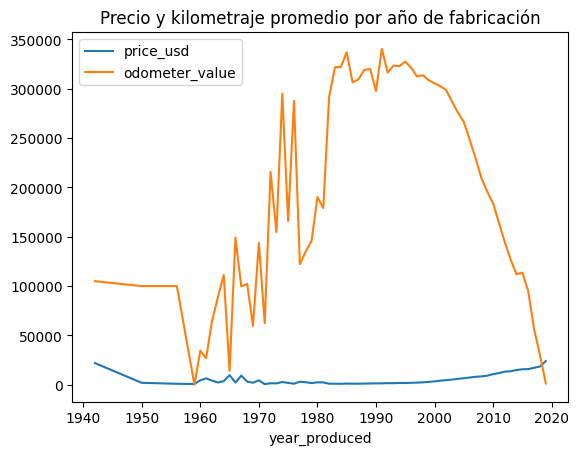

In [12]:
#Relación costo-beneficio por año
df.groupby('year_produced')[['price_usd', 'odometer_value']].mean().plot(secondary_y='mileage')
plt.title('Precio y kilometraje promedio por año de fabricación')
plt.show()

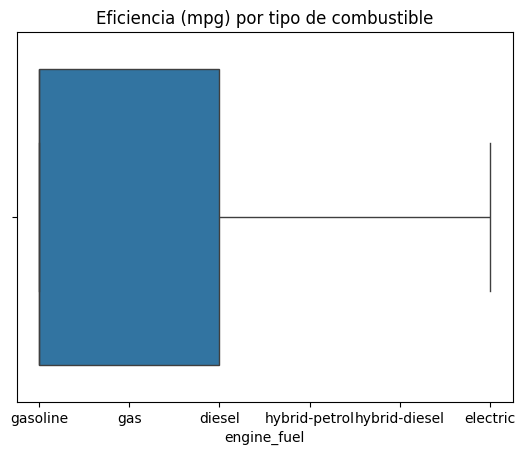

In [15]:
#Tipo de combustible con mayor eficiencia (mpg)
sns.boxplot(x='engine_fuel', data=df)
plt.title('Eficiencia (mpg) por tipo de combustible')
plt.show()